# ***PROBLEM STATEMENT***

This project analyzes over 1.2 million Spotify tracks by clustering them based on audio features using K-Means. After cleaning the dataset—removing missing values, unnecessary columns & details—the Elbow Method is used to determine the optimal number of clusters. Each cluster is then named based on representative track characteristics, and the distribution of songs across these custom-named clusters is explored.

## Exploratory Data Analysis (EDA)

Importing all required libraries.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, accuracy_score

Reading the dataset by mounting google drive.

In [45]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/tracks_features.csv"
df = pd.read_csv(path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


Naming the columns explicitly.

In [46]:
cols = ['id', 'album', 'album_id', 'artist_ids', 'track_number', 'release_date', 'disc_number', 'time_signature', 'key', 'mode', 'year']
df.drop(cols, axis=1, inplace=True)
df.head()

,name,artists,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Testify,['Rage Against The Machine'],False,0.470,0.978,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133
1,Guerrilla Radio,['Rage Against The Machine'],True,0.599,0.957,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200
2,Calm Like a Bomb,['Rage Against The Machine'],False,0.315,0.970,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893
3,Mic Check,['Rage Against The Machine'],True,0.440,0.967,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640
4,Sleep Now In the Fire,['Rage Against The Machine'],False,0.426,0.929,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600


Cleaned the `artists` column by removing punctuation to improve readability.

In [47]:
df['artists'].copy().replace(r'\[|\]|\'', '', regex=True, inplace=True)
df.head()

,name,artists,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Testify,['Rage Against The Machine'],False,0.470,0.978,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133
1,Guerrilla Radio,['Rage Against The Machine'],True,0.599,0.957,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200
2,Calm Like a Bomb,['Rage Against The Machine'],False,0.315,0.970,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893
3,Mic Check,['Rage Against The Machine'],True,0.440,0.967,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640
4,Sleep Now In the Fire,['Rage Against The Machine'],False,0.426,0.929,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600


Obtaining shape of dataset.

In [48]:
df.shape

(1204025, 13)

Removed rows with missing (NaN) values from the dataset using dropna().

In [49]:
df.dropna(inplace=True)
df.shape

(1204022, 13)

Summary of dataset.

In [50]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06,1.204022e+06
mean,4.930560e-01,5.095357e-01,-1.180871e+01,8.438210e-02,4.467521e-01,2.828603e-01,2.015994e-01,4.279866e-01,1.176343e+02,2.488399e+05
std,1.896692e-01,2.946840e-01,6.982138e+00,1.159914e-01,3.852013e-01,3.762846e-01,1.804592e-01,2.704845e-01,3.093707e+01,1.622106e+05
min,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03
25%,3.560000e-01,2.520000e-01,-1.525400e+01,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740892e+05
50%,5.010000e-01,5.240000e-01,-9.791000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243385e+05
75%,6.330000e-01,7.660000e-01,-6.717000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05
max,1.000000e+00,1.000000e+00,7.234000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06


Obtaining the datatype of dataset.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204022 entries, 0 to 1204024
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1204022 non-null  object 
 1   artists           1204022 non-null  object 
 2   explicit          1204022 non-null  bool   
 3   danceability      1204022 non-null  float64
 4   energy            1204022 non-null  float64
 5   loudness          1204022 non-null  float64
 6   speechiness       1204022 non-null  float64
 7   acousticness      1204022 non-null  float64
 8   instrumentalness  1204022 non-null  float64
 9   liveness          1204022 non-null  float64
 10  valence           1204022 non-null  float64
 11  tempo             1204022 non-null  float64
 12  duration_ms       1204022 non-null  int64  
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 120.6+ MB


### Intoducing a new parameter: `time` & dropping `duration_ms` column

In [52]:
df['time'] = df['duration_ms'] / 60000

df.drop('duration_ms', inplace=True, axis=1)
df.head()

,name,artists,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time
0,Testify,['Rage Against The Machine'],False,0.470,0.978,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,3.502217
1,Guerrilla Radio,['Rage Against The Machine'],True,0.599,0.957,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,3.436667
2,Calm Like a Bomb,['Rage Against The Machine'],False,0.315,0.970,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.981550
3,Mic Check,['Rage Against The Machine'],True,0.440,0.967,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,3.560667
4,Sleep Now In the Fire,['Rage Against The Machine'],False,0.426,0.929,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,3.426667


Splitting the dataset between training and test set equally.

In [53]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)

### Introducing a new parameter: `explicit_label`

In [56]:
train_df['explicit_label'] = train_df['explicit'].map({False: 'Non-Explicit', True: 'Explicit'})

## Data Visualization

### Plotting a `KDE Plot` for distribution of `danceability` for explicit & non-explicit songs

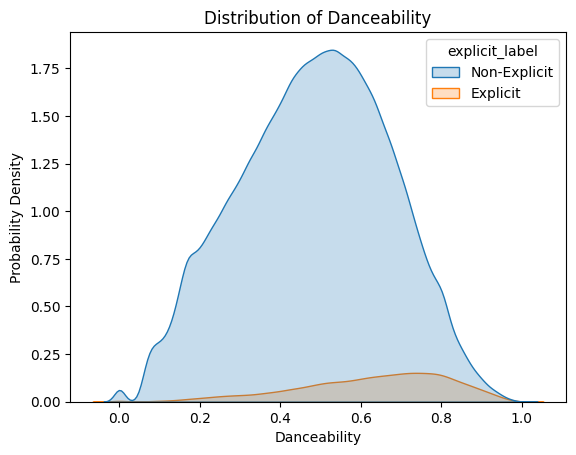

In [57]:
sns.kdeplot(x='danceability', data=train_df, thresh=0.05, fill=True, hue='explicit_label')
plt.xlabel('Danceability')
plt.ylabel('Probability Density')
plt.title('Distribution of Danceability')
plt.show()

### Plotting a `KDE Plot` for distribution of `energy` for explicit & non-explicit songs

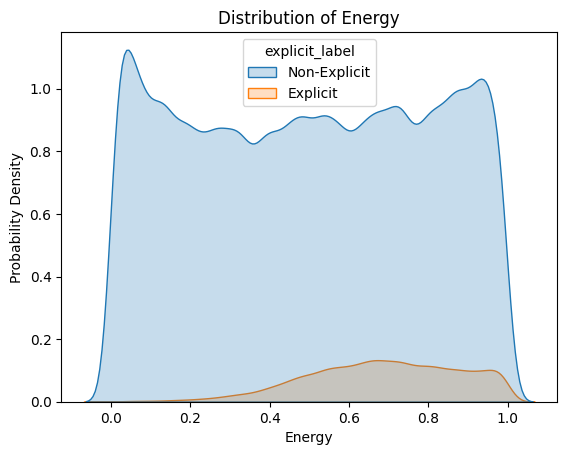

In [58]:
sns.kdeplot(x='energy', data=train_df, thresh=0.05, fill=True, hue='explicit_label')
plt.xlabel('Energy')
plt.ylabel('Probability Density')
plt.title('Distribution of Energy')
plt.show()

### Dropped the `explicit_label` column as it was no longer needed for model training & testing.

In [ ]:
train_df.drop('explicit_label', axis=1, inplace=True)

### Plotting a Correlation Matrix

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Machine Learning Workflow

### Scaling the required columns by `MinMaxScaler()`.

In [ ]:
scaler = MinMaxScaler()

column = ['artists', 'name']
train = train_df.copy().drop(column, axis=1)
test = test_df.copy().drop(column, axis=1)

train_df_scaled = scaler.fit_transform(train)
test_df_scaled = scaler.transform(test)

### Trained `K-Means` with varying cluster counts and applied the `Elbow Method` to select the best one.

In [ ]:
points = []

for k in range(2, 11) :
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(train_df_scaled)
  y_pred = kmeans.predict(train_df_scaled)
  points.append(kmeans.inertia_)
  SS = silhouette_score(train_df_scaled[:10000], y_pred[:10000])
  print(SS)
plt.plot(range(2,11), points)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Selected the best model from the previously trained epochs.

In [ ]:
best = KMeans(n_clusters=5, random_state=42)
best.fit(train_df_scaled)
test['clusters'] = best.predict(test_df_scaled)

Calculating Calinski-Karabasz Score

In [ ]:
CHS = calinski_harabasz_score(train_df_scaled, best.labels_)
print("Calinski-Harabasz Score:" ,CHS)

Calculating Davies-Bouldin Score

In [ ]:
DBS = davies_bouldin_score(train_df_scaled, best.labels_)
print("Davies-Bouldin Score: " ,DBS)

Calculating Silhouette Score

In [ ]:
SS = silhouette_score(train_df_scaled[:10000], best.labels_[:10000])
print("Silhouette Score:" ,SS)

### Retrieved sample data points from each cluster.

In [ ]:
for i in range(test['clusters'].nunique()):
    print(f"\nCluster {i}:")
    print(test[test['clusters'] == i].head(3))

### Named the clusters based on key values observed earlier.

In [ ]:
cluster_tags = {
    0: "Acoustic / Calm Tracks",
    1: "Energetic Instrumentals",
    2: "Happy Pop / Dance Songs",
    3: "Instrumental Ambient / Chill Music",
    4: "Energetic Vocal Tracks"
}
test['cluster_tag'] = test['clusters'].map(cluster_tags)

test.drop('clusters', axis=1, inplace=True)

Calculated the number of data points in each custom-labeled cluster.

In [ ]:
test['cluster_tag'].value_counts()